# K-means算法

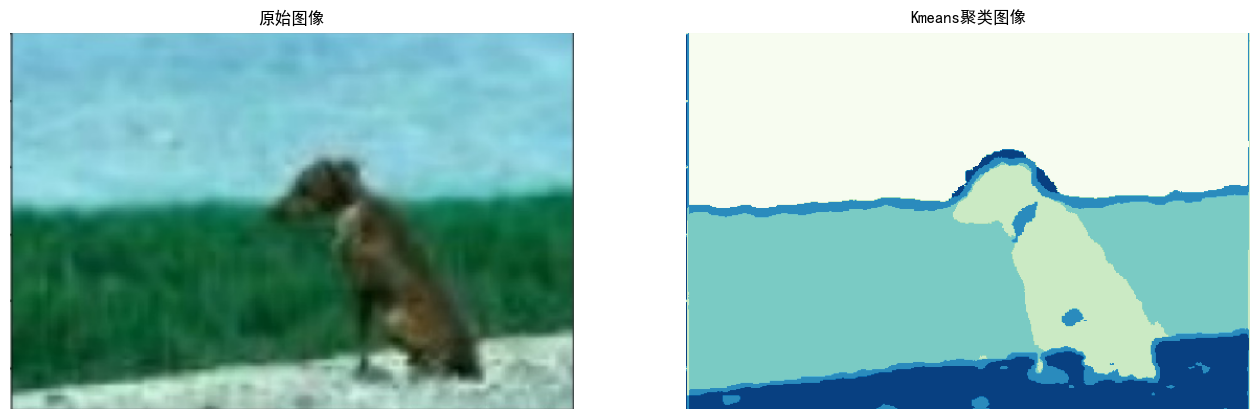

In [12]:
import numpy as np
from PIL import Image
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
image_path = 'D:\python on\PyCharm Community Edition 2022.3.3\机房实验\myweb\myweb\image.jpg'
image=Image.open(image_path)
image_np = np.array(image)   # 将图像转换为NumPy数组
h, w, c = image_np.shape        # 获取图像的尺寸
compress_image = image_np.reshape(h*w, c)
rgb_image = compress_image[:, :3] #忽略Alpha通道
class KMeans:
    def __init__(self,k_num,iter,error):
        self.k_num = k_num   #聚类的数量
        self.iter = iter     #最大迭代次数
        self.error = error   #收敛的阈值

    def train(self,data):
        # 随机选择k_num个样本作为初始质心
        cluster_center = data[np.random.choice(data.shape[0], self.k_num, replace=False)]
        for _ in range(self.iter):
            # 计算所有样本到所有质心的欧氏距离的平方
            distances = np.sum(np.square(data[:, np.newaxis] - cluster_center), axis=-1)
            result = np.argmin(distances, axis=1) # 为每个样本分配最近的质心，即最小距离对应的质心索引
            # 计算每个聚类的新质心，即每个聚类内所有样本的平均值
            new_cluster_center = np.array([data[result == k].mean(axis=0) for k in range(self.k_num)])
            # 如果变化小于预设的误差阈值，则算法收敛，跳出循环
            if np.linalg.norm(cluster_center - new_cluster_center) < self.error:
                break
            cluster_center = new_cluster_center # 更新质心为新计算的质心
        return result
    # 创建KMeans实例进行聚类
kmeans = KMeans(5,500,1e-5)
train_re = kmeans.train(rgb_image)
# 将聚类标签转换为转为原图尺寸
restore_image = train_re.reshape(h,w)
# 显示图像
plt.figure(figsize=(16,10))
plt.subplot(1,2,1) 
plt.imshow(image)
plt.title('原始图像')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(restore_image,cmap='GnBu')
plt.title('Kmeans聚类图像')
plt.axis('off')
plt.show()

# FCM算法

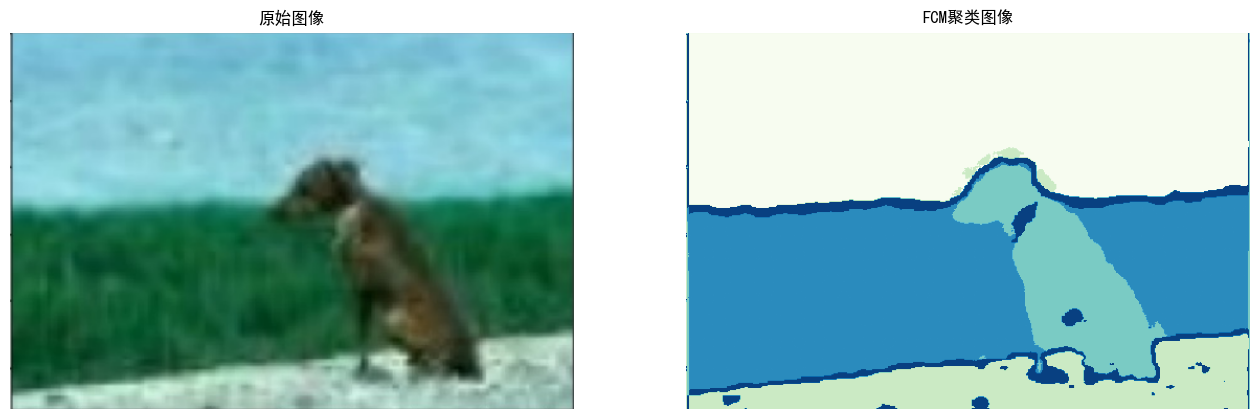

In [13]:
def FCM(data, k_num, m, error, max_its):
    num = data.shape[0]
    # 初始化U矩阵
    u = np.random.random((num, k_num))
    u = np.divide(u, np.sum(u, axis=1)[:, np.newaxis])
    it = 0

    while it < max_its:
        it += 1
        um = u ** m
        # 计算聚类中心
        center = np.divide(np.dot(um.T, data), np.sum(um.T, axis=1)[:, np.newaxis])
        # 计算距离矩阵
        # 使用cdist计算所有点到所有质心的距离
        distance = cdist(data, center, 'euclidean') ** 2

        # 更新U矩阵,计算每个样本对所有聚类的隶属度
        new_u = 1. / (distance ** (2 / (m - 1)))
        new_u = new_u / np.sum(new_u, axis=1)[:, np.newaxis]

        # 检查收敛性
        if np.sum(abs(new_u - u)) < error:
            break
        u = new_u
    # 返回每个点所属的类别
    return np.argmax(u, axis=1)
fcm_result = FCM(rgb_image, 5, 2, 1e-5, 500)
restore_image = fcm_result.reshape(h,w)
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('原始图像')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(restore_image,cmap='GnBu')
plt.title('FCM聚类图像')
plt.axis('off')
plt.show()